# Logistic Regression

In this project, we will build a logistic regression model to predict whether a student gets admitted into a university. The data is from previous applicants, and for each training example, we have the applicant's scores
on two exams and the admissions decision. Our task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

We will write functions to

- compute sigmoid and cost functions,
- learning parameters using fmin_bfgs in scipy.optimize library,
- generate plots to visulaize data and how logistic regression works.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.optimize import fmin_bfgs

## Load and Plot Data

In [3]:
# load data
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

In [4]:
# PlotData plots data points with + for positive examples and o for negative examples
def PlotData(X,y):
    pos_index = np.where(y==1)[0]
    neg_index = np.where(y==0)[0]
    plt.plot(X[pos_index,0],X[pos_index,1],'k+')
    plt.plot(X[neg_index,0],X[neg_index,1],'yo')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted','Not admitted'], loc = 1)
    plt.show()

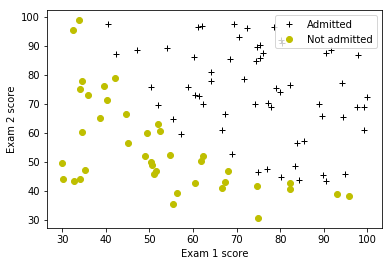

In [5]:
# plot data
PlotData(X,y)

## Compute Cost and Gradient

In [6]:
# compute sigmoid of a variable
def sigmoid(z):
    g = 1./(1.+np.exp(-z))
    return g

In [7]:
# costFunction compute cost and gradient for logistic regression
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    J = -np.dot(y.transpose(),np.log(h)) - np.dot((1-y).transpose(), np.log(1-h))
    J = J/m
    grad = np.dot(X.transpose(), h-y)
    grad = grad/m
    return J, grad

In [8]:
# Add a column of ones to x
m = len(y)
X_withones = np.append(np.ones([m,1]), X, 1)
# initial theta
theta_0 = np.array([0,0,0])

In [9]:
# compute initial cost and gradient
J, grad = costFunction(theta_0, X_withones,y)

In [10]:
# display result
print("initial theta is : \n{}".format(theta_0))
print('cost at initial theta: \n{}'.format(J))
print("gradient at initial theta: \n{}".format(grad))

initial theta is : 
[0 0 0]
cost at initial theta: 
0.69314718056
gradient at initial theta: 
[ -0.1        -12.00921659 -11.26284221]


## Optimizing using fmin_bfgs

In [11]:
# cost function is the objective function passing to fmin_bfgs and get minimized.
def cost(theta, X, y):
    m = len(y)
    J = 0
    h = sigmoid(np.dot(X,theta))
    J = -np.dot(y.transpose(),np.log(h)) - np.dot((1-y).transpose(), np.log(1-h))
    J = J/m
    return J

In [12]:
# gradient function is the gradient of objective function we'll pass to fmin_bfgs 
def gradient(theta, X, y):
    grad = np.zeros([len(theta),1])
    h = sigmoid(np.dot(X,theta))
    grad = np.dot(X.transpose(), h-y)
    grad = grad/m
    return grad

In [13]:
# run fmin_bfgs to obtain the optimal theta
theta_opt = fmin_bfgs(cost, theta_0, fprime=gradient,args=(X_withones,y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


C:\Users\xyguo\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [14]:
# display results
print("optimal theta to minimize cost is: \n{}".format(theta_opt))
print("cost at theta found by fmin_bfgs is: \n{}".format(cost(theta_opt, X_withones, y)))

optimal theta to minimize cost is: 
[-25.16133284   0.2062317    0.2014716 ]
cost at theta found by fmin_bfgs is: 
0.203497701589


In [15]:
# PlotDecisionBoundary plots the data points X and Y with the decision boundary defined by theta
def PlotDecisionBoundary(theta, X, y):
    pos_index = np.where(y==1)[0]
    neg_index = np.where(y==0)[0]
    plt.plot(X[pos_index,1],X[pos_index,2],'k+')
    plt.plot(X[neg_index,1],X[neg_index,2],'yo')
    plot_x = np.array([min(X[:,1])-2, max(X[:,1])+2])
    plot_y = (-1./theta_opt[2])*(theta_opt[1]*plot_x + theta_opt[0])
    plt.plot(plot_x, plot_y)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted','Not admitted','Decision Boundary'], loc = 1)
    plt.xlim([30,100])
    plt.ylim([30,100])
    plt.show()

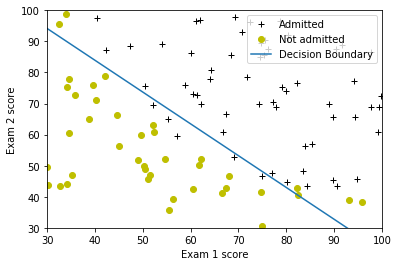

In [16]:
# plot data points with decision boundary defined by learned parameter theta
PlotDecisionBoundary(theta_opt, X_withones, y)

## Predict And Accuracies

In [17]:
# predict probability for a student with score 45 on exam 1 and 85 on exam 2
prob = sigmoid(np.dot([1,45,85], theta_opt))
print('For a student with scores 45 and 85, we predict an admission probability of \n{}'.format(prob))

For a student with scores 45 and 85, we predict an admission probability of 
0.776290724059


In [18]:
# predict function predict whether the label is 0 or 1 using learned logistic regression parameters theta
def predict(theta, X):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    p = np.zeros(m,)
    for i in range(m):
        if h[i] >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p

In [19]:
# compute accuracy on our training set
p = predict(theta_opt, X_withones)
print("Train Accuracy is: {}%".format((p == y).sum()/float(len(y))*100))

Train Accuracy is: 89.0%
